In [4]:
import pandas as pd

# Carregar o arquivo CSV enviado para examinar seu conteúdo
file_path = 'vendas no varejo.csv'
dados_vendas = pd.read_csv(file_path)

# Exibir as primeiras linhas para entender a estrutura do arquivo
dados_vendas.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


# **Análise de Tendência de Vendas por Ano e Mês:**

O gráfico mostra como as vendas no varejo e vendas no armazém evoluíram ao longo do tempo.
As vendas foram agregadas por ano e mês, e um gráfico de linha foi utilizado para identificar possíveis tendências e sazonalidades.

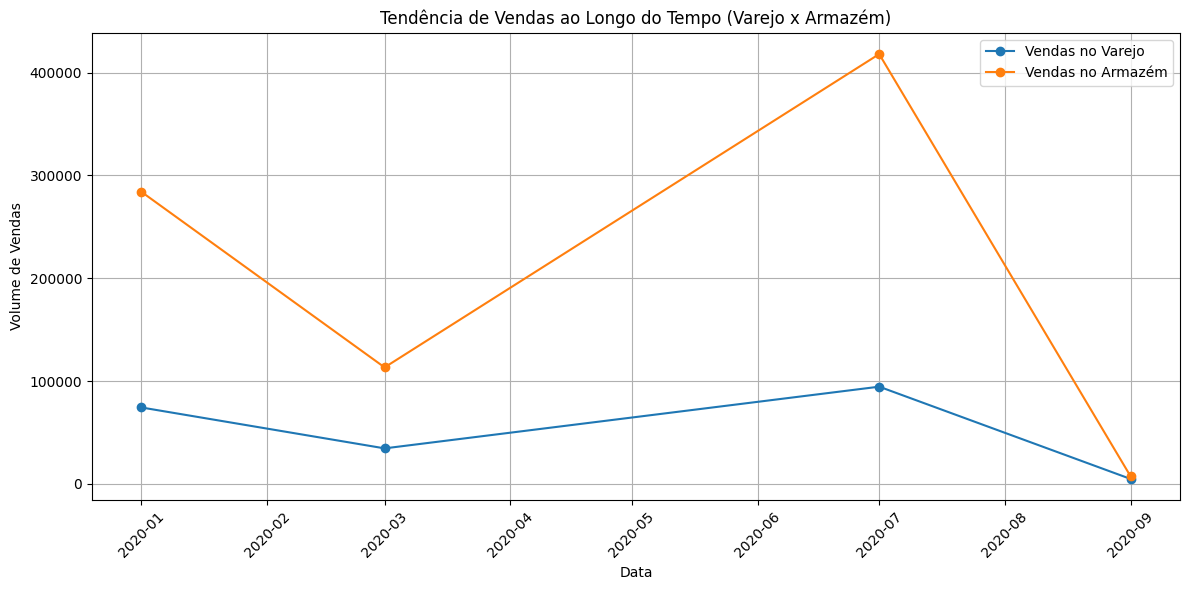

In [6]:
import matplotlib.pyplot as plt

# Agrupar os dados por ano e mês para somar as vendas no varejo e armazém
vendas_tempo = dados_vendas.groupby(['YEAR', 'MONTH']).agg(
    vendas_varejo=('RETAIL SALES', 'sum'),
    vendas_armazem=('WAREHOUSE SALES', 'sum')
).reset_index()

# Criar uma nova coluna de data para facilitar a plotagem
vendas_tempo['data'] = pd.to_datetime(vendas_tempo[['YEAR', 'MONTH']].assign(day=1))

# Plotar a tendência de vendas ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(vendas_tempo['data'], vendas_tempo['vendas_varejo'], label='Vendas no Varejo', marker='o')
plt.plot(vendas_tempo['data'], vendas_tempo['vendas_armazem'], label='Vendas no Armazém', marker='o')

plt.title('Tendência de Vendas ao Longo do Tempo (Varejo x Armazém)')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True)z
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


# **Principais fornecedores com base no volume total de vendas, tanto no varejo quanto em armazém:**

Ao agrupar os dados por fornecedor e calcular a soma das vendas em ambas as categorias, a análise permite determinar quais fornecedores estão gerando mais receita. A classificação dos fornecedores pelo volume total de vendas e a visualização gráfica dos dez principais fornecedores facilitam a identificação de parcerias lucrativas, contribuindo para decisões informadas sobre gerenciamento de fornecedores e estratégias de aquisição.

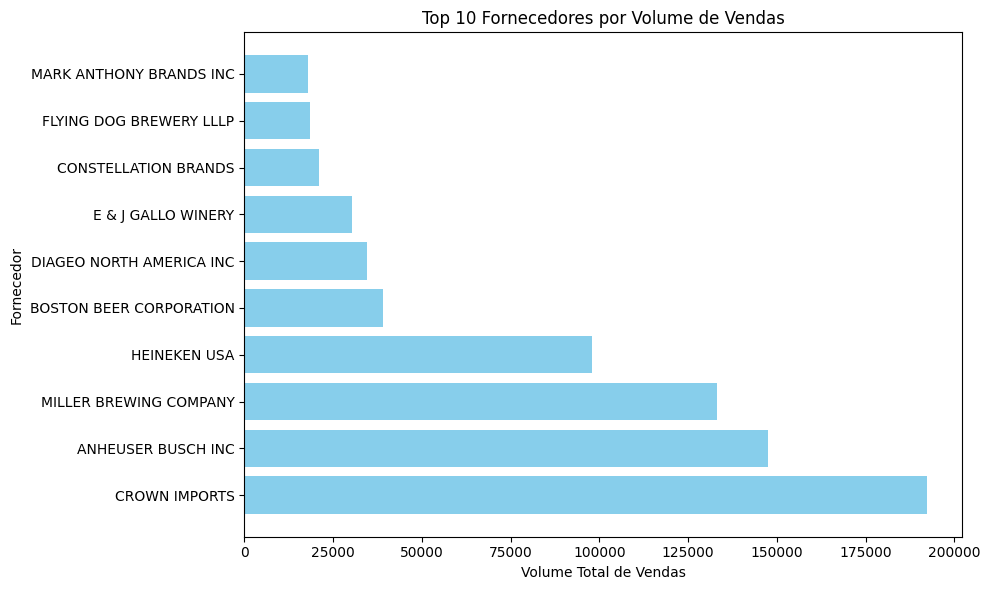

In [8]:
# Agrupar os dados por fornecedor para somar as vendas no varejo e armazém
vendas_fornecedores = dados_vendas.groupby('SUPPLIER').agg(
    total_vendas_varejo=('RETAIL SALES', 'sum'),
    total_vendas_armazem=('WAREHOUSE SALES', 'sum')
).reset_index()

# Ordenar os fornecedores pelo volume total de vendas no varejo
vendas_fornecedores['total_vendas'] = vendas_fornecedores['total_vendas_varejo'] + vendas_fornecedores['total_vendas_armazem']
top_fornecedores = vendas_fornecedores.sort_values(by='total_vendas', ascending=False).head(10)

# Plotar os 10 principais fornecedores
plt.figure(figsize=(10, 6))
plt.barh(top_fornecedores['SUPPLIER'], top_fornecedores['total_vendas'], color='skyblue')
plt.xlabel('Volume Total de Vendas')
plt.ylabel('Fornecedor')
plt.title('Top 10 Fornecedores por Volume de Vendas')
plt.tight_layout()

# Exibir o gráfico
plt.show()


# **Desempenho das vendas de diferentes categorias de produtos, comparando as vendas no varejo e em armazém:**

Ao agrupar os dados por tipo de item e calcular o total de vendas para cada categoria, a análise visa identificar quais produtos estão gerando mais receita. Além disso, a visualização gráfica das vendas totais por categoria permite uma compreensão rápida e clara das áreas mais lucrativas, auxiliando na tomada de decisões estratégicas de marketing e vendas.


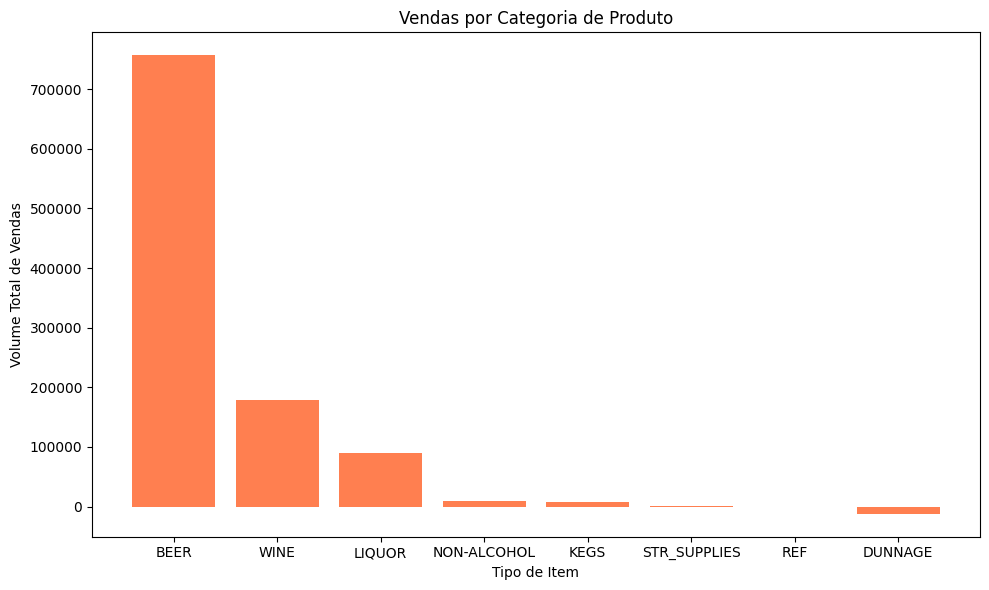

In [9]:
# Agrupar os dados por tipo de item para somar as vendas no varejo e armazém
vendas_categorias = dados_vendas.groupby('ITEM TYPE').agg(
    total_vendas_varejo=('RETAIL SALES', 'sum'),
    total_vendas_armazem=('WAREHOUSE SALES', 'sum')
).reset_index()

# Adicionar uma coluna com o total de vendas (varejo + armazém)
vendas_categorias['total_vendas'] = vendas_categorias['total_vendas_varejo'] + vendas_categorias['total_vendas_armazem']

# Ordenar as categorias pelo volume total de vendas
vendas_categorias = vendas_categorias.sort_values(by='total_vendas', ascending=False)

# Plotar a participação das categorias de produtos
plt.figure(figsize=(10, 6))
plt.bar(vendas_categorias['ITEM TYPE'], vendas_categorias['total_vendas'], color='coral')
plt.xlabel('Tipo de Item')
plt.ylabel('Volume Total de Vendas')
plt.title('Vendas por Categoria de Produto')
plt.tight_layout()

# Exibir o gráfico
plt.show()
